In [1]:
from pinntorch import *
from matplotlib.ticker import FuncFormatter
import matplotlib
import h5py
from matplotlib.transforms import Bbox

In [13]:
def custom_color_normalize(value):
    return value**80
    
def tick_formatter(val, pos):
    skip_indices = [1,2,3,5,15,16,17,18,19,20]  # Adjust the indices you want to skip
    if pos in skip_indices:
        return ''
    elif pos == 1:
        return '('+str(1.0)+')'
    return alphas[pos]

def find_last_threshold_index(physics, validation, threshold = 0.0):
    over = (validation - physics) > threshold
    reversed_arr = np.flipud(over)
    index = len(over) - np.where(reversed_arr == False)[0][0] - 1
    return index

def plot_pareto_front(L_D, L_P, xtick_rotation=0, file_name='heat_pareto_noname', bbox_bounds = (0.1, -0.1, 5.2, 3.8)):
    cmap = matplotlib.colormaps['jet']
    plt.figure(figsize=(5,4))
    low_noise_points = plt.scatter(L_D, L_P, cmap=cmap)  # Use 'viridis' colormap, but you can choose any other
    # Add colorbar for the z values
    #cbar_lown = plt.colorbar(low_noise_points, ticks=custom_color_normalize(np.concatenate(([1.0], data_color))), format=FuncFormatter(tick_formatter))
    #cbar_lown.ax.set_title('$var =$ 0.1')
    #cbar_lown.set_label(r' $α$ (log scaled)', fontsize=13)
    
    plt.ylabel(r"$\mathcal{L}_\mathrm{PHYSICS}$", loc='center', fontsize=13)
    plt.xlabel(r"$\mathcal{L}_\mathrm{DATA}$", loc='center', fontsize=13)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.grid()

    bbox_instance = Bbox.from_bounds(*bbox_bounds)
    plt.xticks(rotation=xtick_rotation)

    plt.savefig(file_name+'.png', dpi=600, bbox_inches=bbox_instance)
    plt.show()

def get_best_indices(physics, validation, threshold):
    best_indices = []
    for i in range(len(physics)):
        best_indices.append(find_last_threshold_index(physics[i], validation[i], threshold))
    return best_indices

In [14]:
def load_group_as_list(file_object, group_name):
    if type(file_object[group_name]) == h5py._hl.group.Group:
        return [np.array(file_object[group_name][str(i)]) for i, x in enumerate(file_object[group_name])]
    return np.array(file_object[group_name])

In [15]:
test_20k = h5py.File('data/2024-04-23/mgda_20k_00/mgda_20k.h5', 'r')

In [16]:
for key in test_20k:
    print(key)

LR
input_data
loss_data
loss_physics
loss_val
settings


In [17]:
#alphas = np.array(test_20k['settings']['alphas'])
#print(alphas)

log_data = load_group_as_list(test_20k, 'loss_data')
log_physics = load_group_as_list(test_20k, 'loss_physics')
log_val = load_group_as_list(test_20k, 'loss_val')

# remove the alpha weights from the loss histories
#for i, _ in enumerate(log_data):
#    log_data[i] = log_data[i]/alphas[i]
#    log_physics[i] = log_physics[i]/(1-alphas[i])


#heat_L5_k1_val = load_group_as_list(heat_L5_k1, 'loss_val')

Error in callback <function _draw_all_if_interactive at 0x0000026BDD0334C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

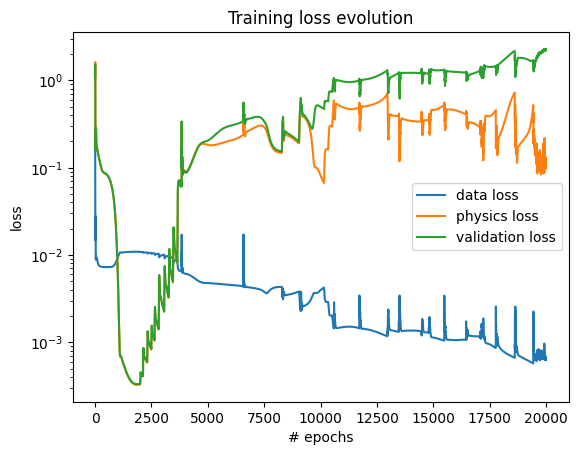

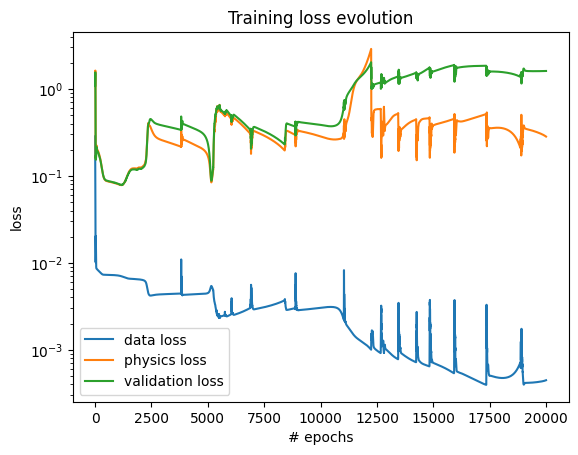

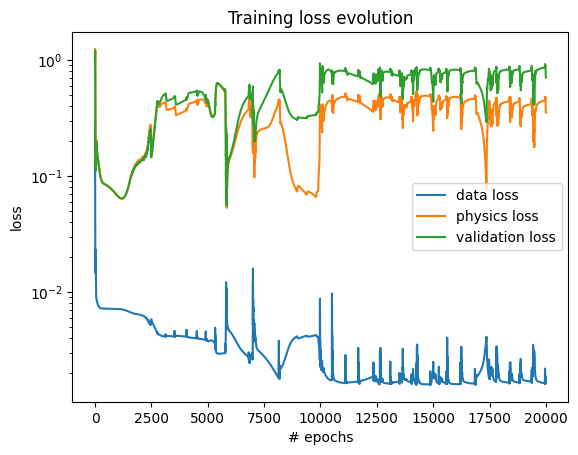

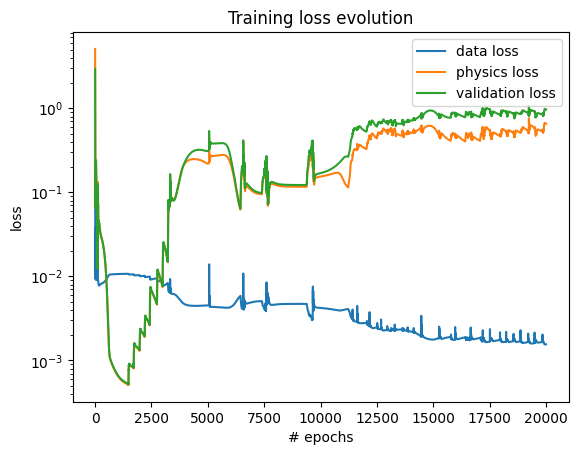

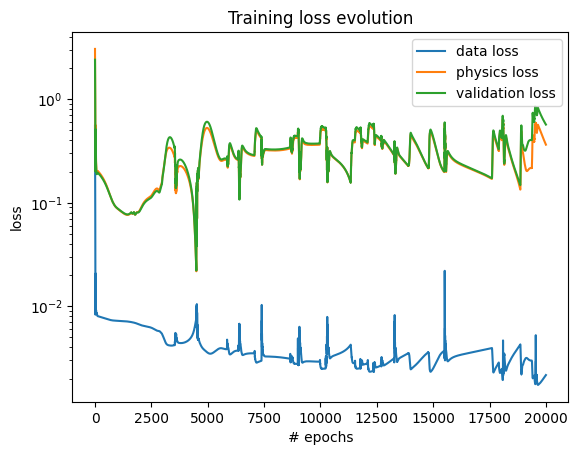

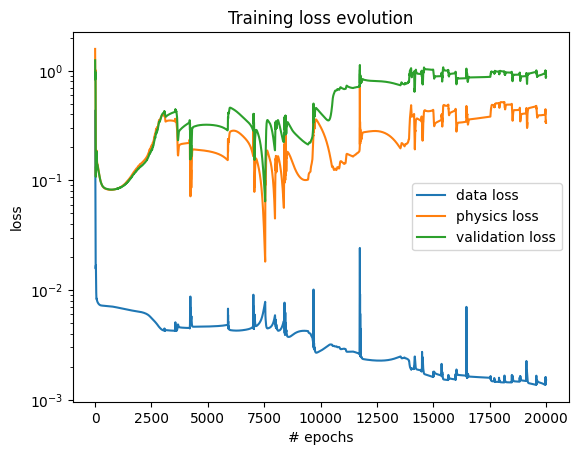

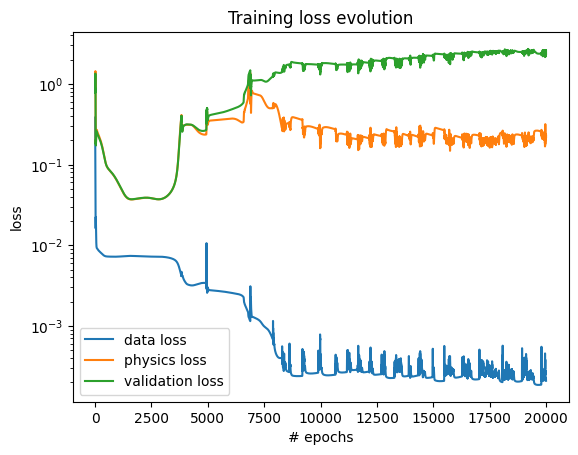

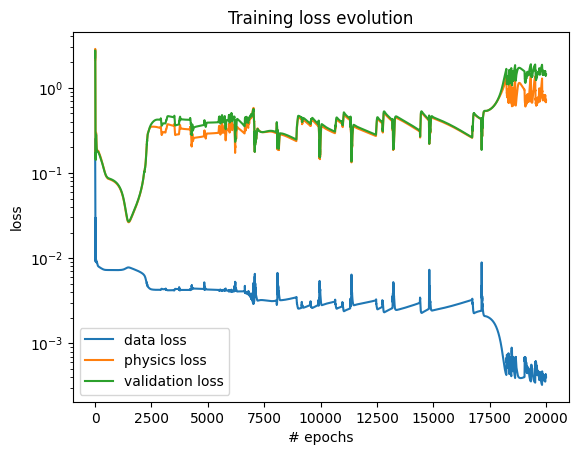

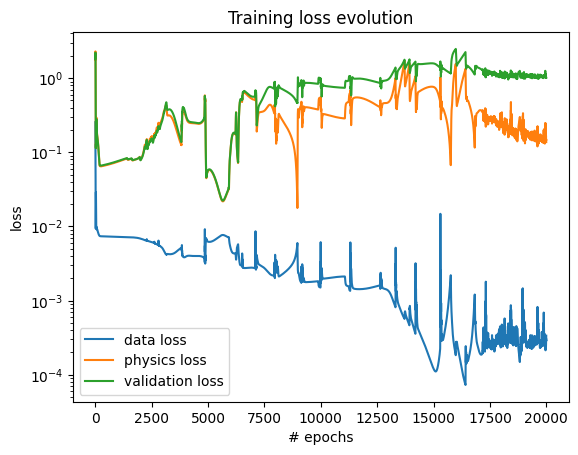

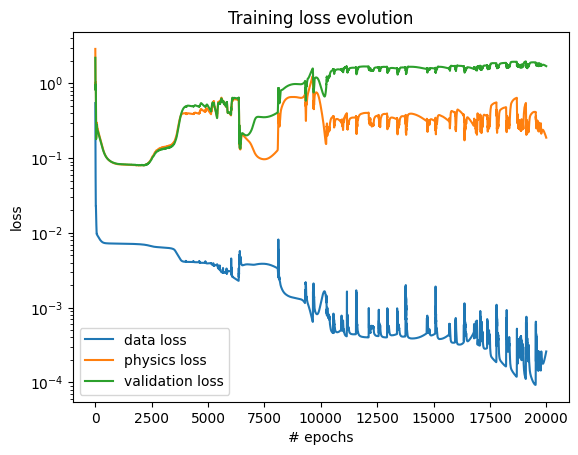

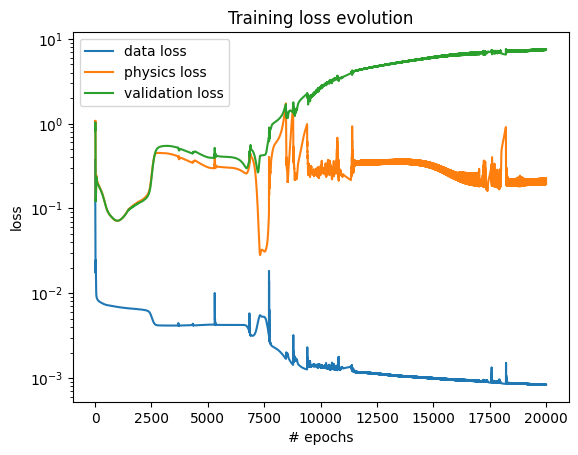

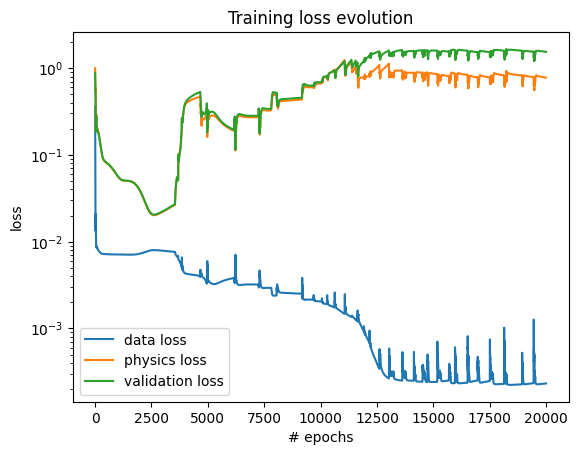

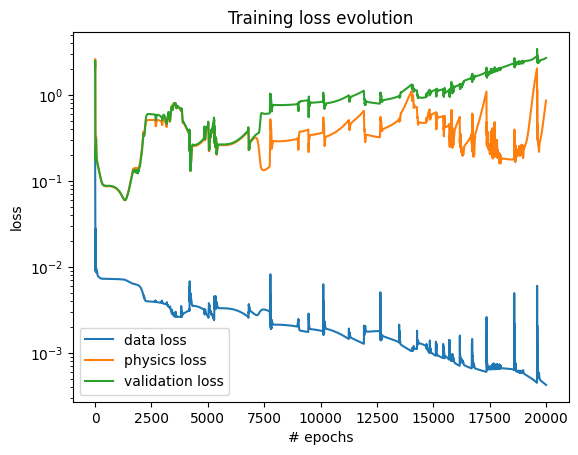

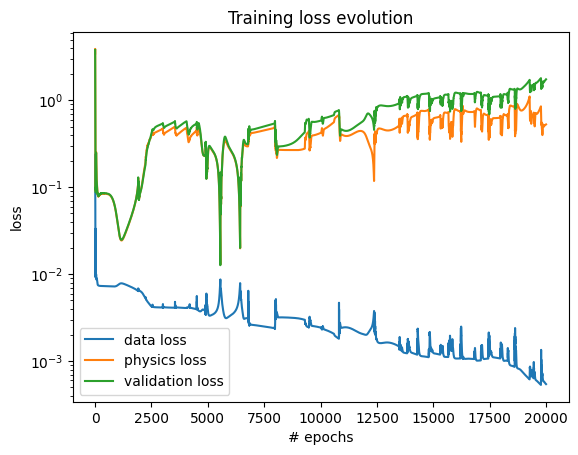

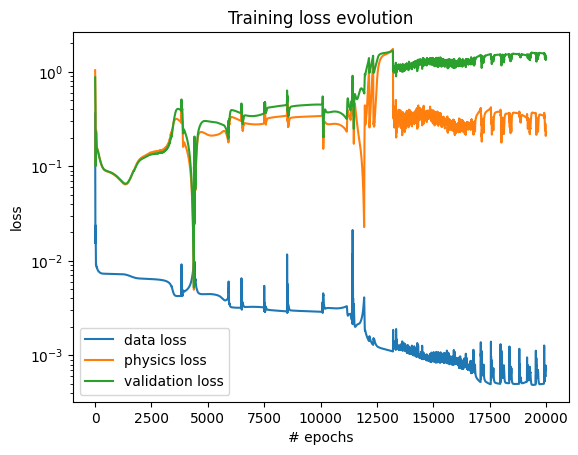

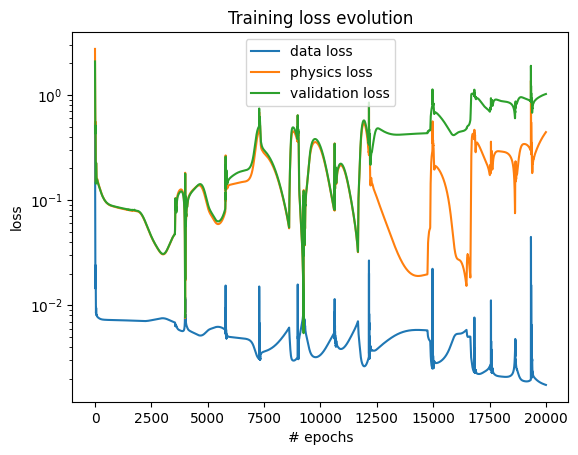

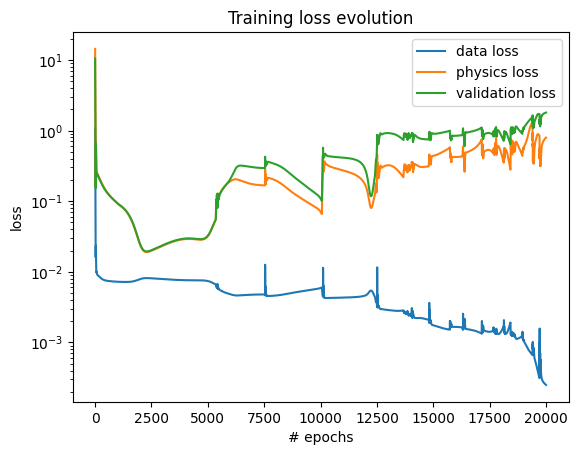

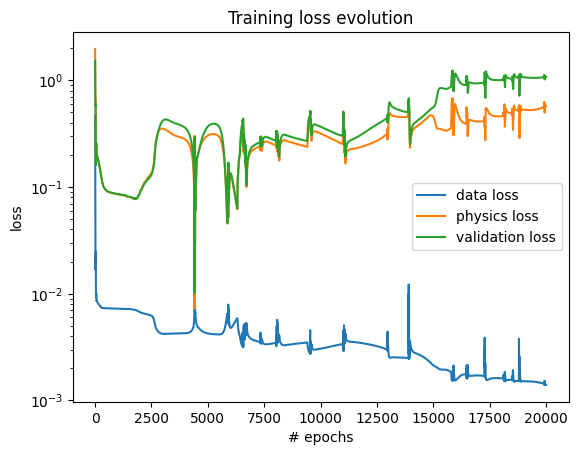

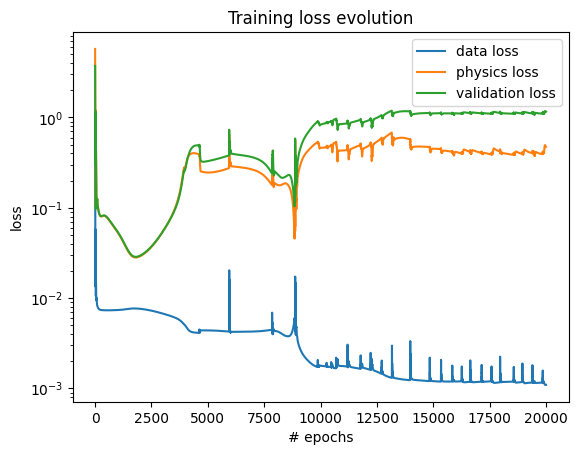

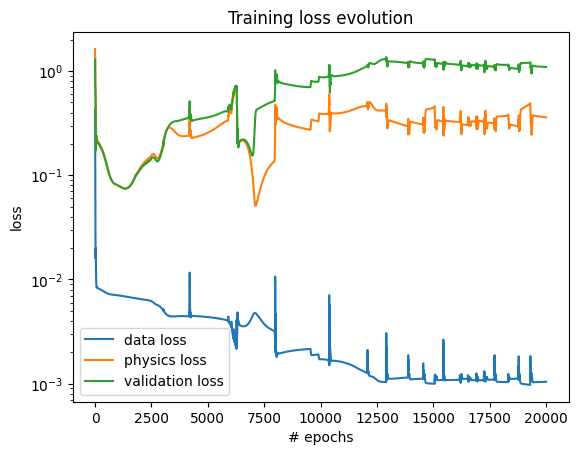

In [18]:
#for i in range(20):
#    plot_evolution([log_data[i], log_physics[i], log_val[i]], ['data loss', 'physics loss', 'validation loss'], linestyle='---')

In [9]:
best_indices = get_best_indices(log_physics, log_val, 0.1)

In [10]:
print(best_indices)
old = [9341,
 5508,
 5685,
 6043,
 6873,
 8022,
 9542,
 8621,
 2638,
 2797,
 3222,
 3874,
 127,
 125,
 168,
 252,
 409,
 520,
 2049,
 49998]

[9631, 12243, 7214, 10967, 19089, 11741, 6884, 18051, 13713, 6942, 8782, 11381, 7244, 11750, 13210, 19337, 12409, 14991, 8976, 7027]


In [11]:
log_best_data = [log_data[i][best_indices[i]] for i in range(len(log_data))]
log_best_physics = [log_physics[i][best_indices[i]] for i in range(len(log_physics))]


In [12]:
plot_pareto_front(log_best_data, log_best_physics, 0, 'log_best', (0.1, -0.1, 5.2, 3.8))

NameError: name 'alphas' is not defined

In [111]:
plot_points = generate_grid((500), domain=(-1.0,1.0))
train_points = generate_grid((20), domain=(-1.0,1.0))

In [133]:
solutions = []
for i in range(20):
    model = PINN(1, 3, 9, 1)
    model.load_state_dict(torch.load('data/2024-04-18/log_50k_9_00/model_'+str(i)+'.pt'))
    solutions.append(f(model, plot_points))

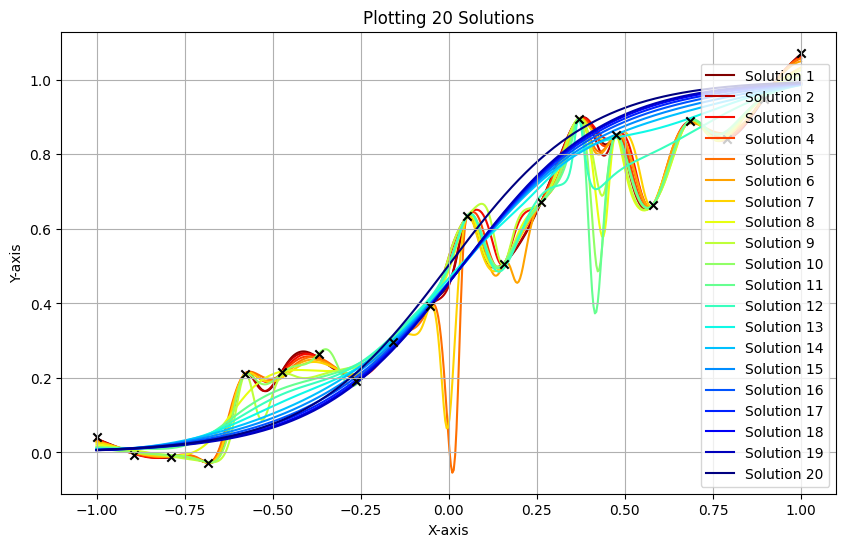

In [143]:

scatter_values = torch.tensor([[0.0404], [-0.0065], [-0.0114], [-0.0272], [0.2105], [0.2157], [0.2643], [0.1914],
                               [0.2962], [0.3944], [0.6350], [0.5071], [0.6726], [0.8957], [0.8512], [0.6636],
                               [0.8899], [0.8401], [0.9480], [1.0728]])

# Plotting
plt.figure(figsize=(10, 6))
jet = plt.get_cmap('jet')
colors = iter(reversed(jet(np.linspace(0, 1, 20)))) 

for sol in solutions:
    plt.plot(plot_points.detach().numpy(), sol.detach().numpy(), color=next(colors), zorder=-1)
plt.grid(True)
plt.scatter(train_points.detach().numpy(), scatter_values.numpy(), color='black', marker='x', zorder=1)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting 20 Solutions')
plt.legend([f'Solution {i+1}' for i in range(20)])

plt.show()